In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('population_changes.csv')

data = data.head(50000)
data

C:\Users\micha\AppData\Local\Temp\ipykernel_15728\1474891783.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('population_changes.csv')


,Rok,NObce,NázevObce,Vznik,Stav 1.1.,Narození,Zemřelí,Přistěhovalí,Vystěhovalí,PřírůstekPřirozený,PřírůstekMigrační,PřírůstekCelkový,ÚzemníZměna1,Stav 31.12.,ÚzemníZměna2,Odkud,Odkud (název obce),Kam,Kam (název obce),KAM
0,1971,210001,Běchovice,-,1859,17,35,75,97,-18,-22,-40,-,1819,-,NaN,NaN,NaN,NaN,NaN
1,1972,210001,Běchovice,-,1819,26,26,103,63,-,40,40,-,1859,-,NaN,NaN,NaN,NaN,NaN
2,1973,210001,Běchovice,-,1859,26,28,59,75,-2,-16,-18,-,1841,-1841,NaN,NaN,554782.0,Praha,NaN
3,1971,210002,Benice,-,336,9,4,6,15,5,-9,-4,-,332,-,NaN,NaN,NaN,NaN,NaN
4,1972,210002,Benice,-,332,2,8,7,20,-6,-13,-19,-,313,-,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2007,541389,Svaté Pole,-,328,5,1,15,2,4,13,17,-,345,-,NaN,NaN,NaN,NaN,NaN
49996,2008,541389,Svaté Pole,-,345,3,2,18,5,1,13,14,-,359,-,NaN,NaN,NaN,NaN,NaN
49997,2009,541389,Svaté Pole,-,359,3,5,7,4,-2,3,1,-,360,-,NaN,NaN,NaN,NaN,NaN
49998,2010,541389,Svaté Pole,-,360,3,5,18,5,-2,13,11,-,371,-,NaN,NaN,NaN,NaN,NaN


1. Visualize population changes on map
   1. One year
   2. changes over time - can we visualize timeseries?
2. city shifts - inclusions and exclusions

(array([130., 122., 116., 118., 110., 101.,  96.,  86.,  80.,  80.]),
 array([  0. ,  76.3, 152.6, 228.9, 305.2, 381.5, 457.8, 534.1, 610.4,
        686.7, 763. ]),
 <BarContainer object of 10 artists>)

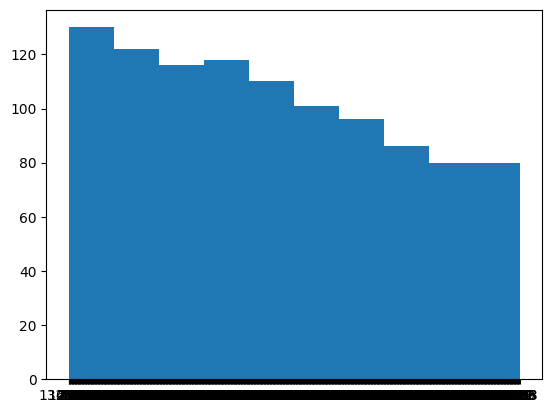

In [2]:
data2020 =data[data.Rok == 2020]
plt.hist(data2020['Stav 1.1.'], bins=10)


# data2020['Stav 1.1.']

In [3]:
towns_qps = pd.read_csv('data/obce-cr-gps.csv')
towns_qps.rename(columns={'sirka':'lats', 'delka': 'lons'}, inplace=True)

data2020 = data2020.merge(towns_qps, left_on='NObce', right_on='obeckod')
data2020

,Rok,NObce,NázevObce,Vznik,Stav 1.1.,Narození,Zemřelí,Přistěhovalí,Vystěhovalí,PřírůstekPřirozený,...,KAM,obec,obeckod,okres,okreskod,kraj,krajkod,psc,lats,lons
0,2020,554782,Praha,-,1324277,14713,13621,40582,30867,1092,...,NaN,Praha,554782,Praha,CZ0100,Hlavní město Praha,CZ010,11000,50.075638,14.437900
1,2020,529303,Benešov,-,16758,151,202,557,460,-51,...,NaN,Benešov,529303,Benešov,CZ0201,Středočeský kraj,CZ020,25601,49.783882,14.687470
2,2020,532568,Bernartice,-,234,1,6,3,3,-5,...,NaN,Bernartice,532568,Benešov,CZ0201,Středočeský kraj,CZ020,25765,49.675666,15.129249
3,2020,530743,Bílkovice,-,218,1,5,6,3,-4,...,NaN,Bílkovice,530743,Benešov,CZ0201,Středočeský kraj,CZ020,25726,49.759822,14.861056
4,2020,532380,Blažejovice,-,111,-,6,-,2,-6,...,NaN,Blažejovice,532380,Benešov,CZ0201,Středočeský kraj,CZ020,25768,49.619897,15.200036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2020,541311,Smolotely,-,243,2,2,11,4,-,...,NaN,Smolotely,541311,Příbram,CZ020B,Středočeský kraj,CZ020,26263,49.620697,14.135669
1035,2020,541320,Solenice,-,385,3,10,12,19,-7,...,NaN,Solenice,541320,Příbram,CZ020B,Středočeský kraj,CZ020,26263,49.617671,14.195881
1036,2020,541338,Stará Huť,-,1503,16,15,64,47,1,...,NaN,Stará Huť,541338,Příbram,CZ020B,Středočeský kraj,CZ020,26202,49.782357,14.197461
1037,2020,564583,Starosedlský Hrádek,-,134,1,-,4,6,1,...,NaN,Starosedlský Hrádek,564583,Příbram,CZ020B,Středočeský kraj,CZ020,26272,49.576290,14.008329


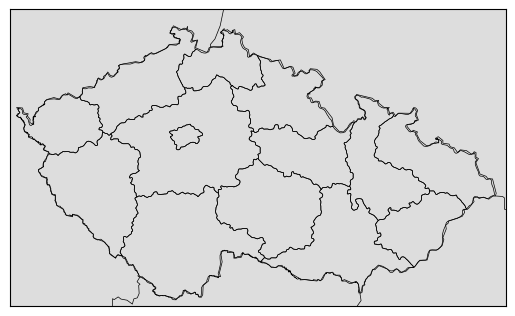

,obec,obeckod,okres,okreskod,kraj,krajkod,psc,lats,lons
0,Abertamy,554979,Karlovy Vary,CZ0412,Karlovarský kraj,CZ041,36235,50.368855,12.818377
1,Adamov,535826,České Budějovice,CZ0311,Jihočeský kraj,CZ031,37371,49.000624,14.539603
2,Adamov,581291,Blansko,CZ0641,Jihomoravský kraj,CZ064,67904,49.295708,16.663955
3,Adamov,531367,Kutná Hora,CZ0205,Středočeský kraj,CZ020,28601,49.857917,15.409018
4,Adršpach,547786,Náchod,CZ0523,Královéhradecký kraj,CZ052,54957,50.624387,16.083501
...,...,...,...,...,...,...,...,...,...
6248,Žlutice,555762,Karlovy Vary,CZ0412,Karlovarský kraj,CZ041,36452,50.092028,13.163084
6249,Žulová,541575,Jeseník,CZ0711,Olomoucký kraj,CZ071,79065,50.309430,17.098814
6250,Žumberk,572641,Chrudim,CZ0531,Pardubický kraj,CZ053,53836,49.873077,15.858205
6251,Županovice,562424,Jindřichův Hradec,CZ0313,Jihočeský kraj,CZ031,37881,48.957211,15.506224


In [10]:
from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt

ll_lon, ur_lon, ll_lat, ur_lat = 0, 0, 0, 0
m = Basemap(projection='merc',llcrnrlat=48.5,urcrnrlat=51.2,
            llcrnrlon=12,urcrnrlon=19,lat_ts=20,resolution='i')

# lats = towns_qps['sirka']
# lons = towns_qps['delka']
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='#dddddd', lake_color='#0000ff')
m.readshapefile('shapefiles/cz', 'cz', drawbounds=True)
# x, y = m(lons, lats)
# plt.plot(x, y, 'bo', color='r', markersize=5)

plt.show()
towns_qps


In [5]:
shp_info = m.readshapefile('shapefiles/countries', 'countries', drawbounds=True)

OSError: cannot locate shapefiles/countries.shp